In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras

2023-05-25 13:15:54.148440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
import tensorflow as tf

In [8]:
import seaborn as sns
from itertools import product

In [9]:
df = pd.read_csv('Cars.csv').drop(columns = 'name')
df['km_driven'] = np.log10(df['km_driven'])
df['selling_price'] = np.log10(df['selling_price'])
sp = df.pop('selling_price')
df.insert(0,sp.name,sp)
df

,selling_price,owner,Age,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
0,4.778151,0,16,4.845098,0,1,0,1,1
1,5.130334,0,16,4.698970,0,1,0,1,1
2,5.778151,0,11,5.000000,1,0,0,1,1
3,5.397940,0,6,4.662758,0,1,0,1,1
4,5.653213,1,9,5.149219,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
4335,5.612783,1,9,4.903090,1,0,0,1,1
4336,5.612783,1,9,4.903090,1,0,0,1,1
4337,5.041393,1,14,4.919078,0,1,0,1,1
4338,5.937016,0,7,4.954243,1,0,0,1,1


<Axes: xlabel='km_driven', ylabel='selling_price'>

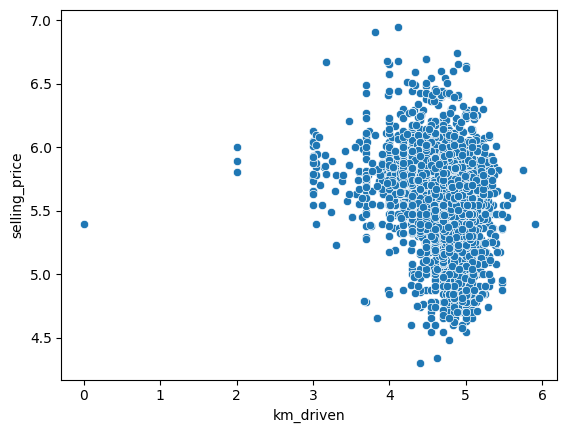

In [5]:
sns.scatterplot(data = df, x = 'km_driven', y = 'selling_price')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0], test_size = .2)

In [11]:
X_train

,owner,Age,km_driven,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Manual
701,0,7,4.477121,1,0,0,1,1
3752,0,8,5.041393,0,0,0,1,1
3533,0,12,5.243038,1,0,0,1,1
2369,0,13,4.806180,0,1,1,0,1
2854,1,14,4.903090,0,1,0,1,1
...,...,...,...,...,...,...,...,...
2763,0,4,4.176091,0,1,0,1,1
3731,1,8,4.633468,0,1,0,1,1
4334,0,11,5.230449,1,0,0,1,1
2978,1,8,5.146128,1,0,0,1,1


In [17]:
keras.losses

<module 'keras.api._v2.keras.losses' from '/Users/claytonchan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/api/_v2/keras/losses/__init__.py'>

In [116]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
NN = keras.Sequential([
    keras.layers.Dense(6, input_shape=(8,), activation='sigmoid', name = 'layer1'),
    keras.layers.Dense(4, activation='relu', name = 'layer2'),
    keras.layers.Dense(1, activation='relu', name = 'output')
])
NN.compile(optimizer='sgd',
           loss=keras.losses.MeanSquaredError(),
            metrics=['mean_squared_error'])
NN.fit(X_train, y_train, epochs=1000, batch_size=100, callbacks=[callback])

Epoch 1/1000
35/35 [==============================] - 0s 686us/step - loss: 1.8681 - mean_squared_error: 1.8681
Epoch 2/1000
35/35 [==============================] - 0s 712us/step - loss: 0.1878 - mean_squared_error: 0.1878
Epoch 3/1000
35/35 [==============================] - 0s 660us/step - loss: 0.1713 - mean_squared_error: 0.1713
Epoch 4/1000
35/35 [==============================] - 0s 656us/step - loss: 0.1619 - mean_squared_error: 0.1619
Epoch 5/1000
35/35 [==============================] - 0s 596us/step - loss: 0.1554 - mean_squared_error: 0.1554
Epoch 6/1000
35/35 [==============================] - 0s 644us/step - loss: 0.1501 - mean_squared_error: 0.1501
Epoch 7/1000
35/35 [==============================] - 0s 602us/step - loss: 0.1461 - mean_squared_error: 0.1461
Epoch 8/1000
35/35 [==============================] - 0s 656us/step - loss: 0.1429 - mean_squared_error: 0.1429
Epoch 9/1000
35/35 [==============================] - 0s 644us/step - loss: 0.1400 - mean_squared_error:

35/35 [==============================] - 0s 726us/step - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 74/1000
35/35 [==============================] - 0s 756us/step - loss: 0.0503 - mean_squared_error: 0.0503
Epoch 75/1000
35/35 [==============================] - 0s 710us/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 76/1000
35/35 [==============================] - 0s 706us/step - loss: 0.0496 - mean_squared_error: 0.0496
Epoch 77/1000
35/35 [==============================] - 0s 701us/step - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 78/1000
35/35 [==============================] - 0s 678us/step - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 79/1000
35/35 [==============================] - 0s 697us/step - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 80/1000
35/35 [==============================] - 0s 660us/step - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 81/1000
35/35 [==============================] - 0s 619us/step - loss: 0.0489 - mean_squared_error: 0.04

35/35 [==============================] - 0s 633us/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 146/1000
35/35 [==============================] - 0s 668us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 147/1000
35/35 [==============================] - 0s 693us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 148/1000
35/35 [==============================] - 0s 646us/step - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 149/1000
35/35 [==============================] - 0s 703us/step - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 150/1000
35/35 [==============================] - 0s 671us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 151/1000
35/35 [==============================] - 0s 656us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 152/1000
35/35 [==============================] - 0s 663us/step - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 153/1000
35/35 [==============================] - 0s 640us/step - loss: 0.0432 - mean_squared_err

Epoch 217/1000
35/35 [==============================] - 0s 699us/step - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 218/1000
35/35 [==============================] - 0s 664us/step - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 219/1000
35/35 [==============================] - 0s 741us/step - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 220/1000
35/35 [==============================] - 0s 649us/step - loss: 0.0421 - mean_squared_error: 0.0421
Epoch 221/1000
35/35 [==============================] - 0s 706us/step - loss: 0.0424 - mean_squared_error: 0.0424
Epoch 222/1000
35/35 [==============================] - 0s 647us/step - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 223/1000
35/35 [==============================] - 0s 662us/step - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 224/1000
35/35 [==============================] - 0s 664us/step - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 225/1000
35/35 [==============================] - 0s 619us/step - loss: 0.0419 - m

35/35 [==============================] - 0s 627us/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 289/1000
35/35 [==============================] - 0s 706us/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 290/1000
35/35 [==============================] - 0s 696us/step - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 291/1000
35/35 [==============================] - 0s 719us/step - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 292/1000
35/35 [==============================] - 0s 676us/step - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 293/1000
35/35 [==============================] - 0s 672us/step - loss: 0.0418 - mean_squared_error: 0.0418
Epoch 294/1000
35/35 [==============================] - 0s 702us/step - loss: 0.0419 - mean_squared_error: 0.0419
Epoch 295/1000
35/35 [==============================] - 0s 659us/step - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 296/1000
35/35 [==============================] - 0s 675us/step - loss: 0.0416 - mean_squared_err

In [114]:
layer1 = range(9)
layer2 = range(9)
act1 = ['relu','sigmoid','softplus']
act2 = ['relu','sigmoid','softplus']
param = list(product(layer1,layer2,act1,act2))

In [92]:
Eval = {}
for layer1,layer2,act1,act2 in param:
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
    NN = keras.Sequential([
        keras.layers.Dense(layer1, input_shape=(8,), activation=act1, name = 'layer1'),
        keras.layers.Dense(layer2, activation=act2, name = 'layer2'),
        keras.layers.Dense(1, activation='relu', name = 'output')
    ])
    NN.compile(optimizer='sgd',
               loss=keras.losses.MeanSquaredError(),
                metrics=['mean_squared_error'])
    NN.fit(X_train, y_train, epochs=1000, batch_size=100, callbacks=[callback])
    y_pred = NN.predict(X_test)
    Eval[(layer1,layer2,act1,act2)] = (mean_squared_error(y_pred,y_test),r2_score(y_pred,y_test))

Epoch 1/1000
35/35 [==============================] - 0s 670us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 2/1000
35/35 [==============================] - 0s 692us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 3/1000
35/35 [==============================] - 0s 661us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [==============================] - 0s 591us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 5/1000
35/35 [==============================] - 0s 642us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 6/1000
35/35 [==============================] - 0s 635us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 7/1000
35/35 [==============================] - 0s 693us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 8/1000
35/35 [==============================] - 0s 619us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 9/1000
35/35 [==============================] - 0s 659us/step - loss: 30.9032 - me

35/35 [==============================] - 0s 605us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 14/1000
35/35 [==============================] - 0s 642us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 15/1000
35/35 [==============================] - 0s 602us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 16/1000
35/35 [==============================] - 0s 618us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 625us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 18/1000
35/35 [==============================] - 0s 658us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 19/1000
35/35 [==============================] - 0s 663us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 20/1000
35/35 [==============================] - 0s 616us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 21/1000
35/35 [==============================] - 0s 633us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 581us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 11/1000
35/35 [==============================] - 0s 579us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 12/1000
35/35 [==============================] - 0s 594us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 13/1000
35/35 [==============================] - 0s 599us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 14/1000
35/35 [==============================] - 0s 613us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 15/1000
35/35 [==============================] - 0s 590us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 16/1000
35/35 [==============================] - 0s 572us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 584us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 18/1000
35/35 [==============================] - 0s 593us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 606us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 29/1000
35/35 [==============================] - 0s 658us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 30/1000
35/35 [==============================] - 0s 614us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 31/1000
35/35 [==============================] - 0s 621us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 32/1000
35/35 [==============================] - 0s 593us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 33/1000
35/35 [==============================] - 0s 642us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 34/1000
35/35 [==============================] - 0s 606us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 35/1000
35/35 [==============================] - 0s 617us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 36/1000
35/35 [==============================] - 0s 664us/step - loss: 0.1325 - mean_squared_error: 0.13

35/35 [==============================] - 0s 602us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 33/1000
35/35 [==============================] - 0s 560us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 34/1000
35/35 [==============================] - 0s 575us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 35/1000
35/35 [==============================] - 0s 598us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 36/1000
35/35 [==============================] - 0s 610us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 37/1000
35/35 [==============================] - 0s 587us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 38/1000
35/35 [==============================] - 0s 599us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 39/1000
35/35 [==============================] - 0s 573us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 40/1000
28/28 [==============================] - 0s 565us/step
Epoch 1/1000
35/35 [=====

28/28 [==============================] - 0s 497us/step
Epoch 1/1000
35/35 [==============================] - 0s 640us/step - loss: 11.5851 - mean_squared_error: 11.5851
Epoch 2/1000
35/35 [==============================] - 0s 599us/step - loss: 1.4895 - mean_squared_error: 1.4895
Epoch 3/1000
35/35 [==============================] - 0s 587us/step - loss: 0.2931 - mean_squared_error: 0.2931
Epoch 4/1000
35/35 [==============================] - 0s 543us/step - loss: 0.1517 - mean_squared_error: 0.1517
Epoch 5/1000
35/35 [==============================] - 0s 540us/step - loss: 0.1350 - mean_squared_error: 0.1350
Epoch 6/1000
35/35 [==============================] - 0s 555us/step - loss: 0.1329 - mean_squared_error: 0.1329
Epoch 7/1000
35/35 [==============================] - 0s 556us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 8/1000
35/35 [==============================] - 0s 544us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 9/1000
35/35 [===========================

35/35 [==============================] - 0s 565us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 14/1000
35/35 [==============================] - 0s 570us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 15/1000
35/35 [==============================] - 0s 550us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 16/1000
35/35 [==============================] - 0s 548us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 550us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 18/1000
35/35 [==============================] - 0s 553us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 19/1000
35/35 [==============================] - 0s 555us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 20/1000
35/35 [==============================] - 0s 554us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 21/1000
35/35 [==============================] - 0s 592us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 537us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 25/1000
35/35 [==============================] - 0s 549us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 26/1000
35/35 [==============================] - 0s 545us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 27/1000
35/35 [==============================] - 0s 547us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 28/1000
28/28 [==============================] - 0s 466us/step
Epoch 1/1000
35/35 [==============================] - 0s 630us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 2/1000
35/35 [==============================] - 0s 621us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 3/1000
35/35 [==============================] - 0s 579us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [==============================] - 0s 544us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 5/1000
35/35 [=================

35/35 [==============================] - 0s 593us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 577us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 18/1000
35/35 [==============================] - 0s 560us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 19/1000
35/35 [==============================] - 0s 586us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 20/1000
35/35 [==============================] - 0s 642us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 21/1000
35/35 [==============================] - 0s 595us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 22/1000
35/35 [==============================] - 0s 581us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 23/1000
35/35 [==============================] - 0s 609us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 24/1000
35/35 [==============================] - 0s 595us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 531us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 20/1000
35/35 [==============================] - 0s 552us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 21/1000
35/35 [==============================] - 0s 547us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 22/1000
35/35 [==============================] - 0s 512us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 23/1000
35/35 [==============================] - 0s 517us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 24/1000
35/35 [==============================] - 0s 540us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 25/1000
35/35 [==============================] - 0s 528us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 26/1000
35/35 [==============================] - 0s 528us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 27/1000
35/35 [==============================] - 0s 535us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 603us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [==============================] - 0s 526us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 5/1000
35/35 [==============================] - 0s 510us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 6/1000
35/35 [==============================] - 0s 516us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 7/1000
35/35 [==============================] - 0s 549us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 8/1000
35/35 [==============================] - 0s 533us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 9/1000
35/35 [==============================] - 0s 524us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 10/1000
35/35 [==============================] - 0s 535us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 11/1000
35/35 [==============================] - 0s 530us/step - loss: 30.9032 - mean_squared_

35/35 [==============================] - 0s 569us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 562us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 18/1000
35/35 [==============================] - 0s 561us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 19/1000
35/35 [==============================] - 0s 538us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 20/1000
35/35 [==============================] - 0s 538us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 21/1000
35/35 [==============================] - 0s 557us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 22/1000
35/35 [==============================] - 0s 529us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 23/1000
35/35 [==============================] - 0s 558us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 24/1000
28/28 [==============================] - 0s 497us/step
Epoch 1/1000
35/35 [=====

35/35 [==============================] - 0s 540us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 6/1000
35/35 [==============================] - 0s 546us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 7/1000
35/35 [==============================] - 0s 523us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 8/1000
35/35 [==============================] - 0s 538us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 9/1000
35/35 [==============================] - 0s 541us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 10/1000
35/35 [==============================] - 0s 537us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 11/1000
35/35 [==============================] - 0s 539us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 12/1000
35/35 [==============================] - 0s 539us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 13/1000
35/35 [==============================] - 0s 548us/step - loss: 0.1325 - mean_squared_error: 0.1325
E

35/35 [==============================] - 0s 539us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 10/1000
35/35 [==============================] - 0s 545us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 11/1000
35/35 [==============================] - 0s 550us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 12/1000
35/35 [==============================] - 0s 532us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 13/1000
35/35 [==============================] - 0s 549us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 14/1000
35/35 [==============================] - 0s 542us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 15/1000
35/35 [==============================] - 0s 548us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 16/1000
35/35 [==============================] - 0s 547us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 553us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 535us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 36/1000
35/35 [==============================] - 0s 553us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 37/1000
35/35 [==============================] - 0s 550us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 38/1000
35/35 [==============================] - 0s 533us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 39/1000
35/35 [==============================] - 0s 536us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 40/1000
35/35 [==============================] - 0s 540us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 41/1000
35/35 [==============================] - 0s 561us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 42/1000
35/35 [==============================] - 0s 528us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 43/1000
35/35 [==============================] - 0s 532us/step - loss: 0.1326 - mean_squared_error: 0.13

28/28 [==============================] - 0s 481us/step
Epoch 1/1000
35/35 [==============================] - 0s 638us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 2/1000
35/35 [==============================] - 0s 629us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 3/1000
35/35 [==============================] - 0s 622us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [==============================] - 0s 615us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 5/1000
35/35 [==============================] - 0s 616us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 6/1000
35/35 [==============================] - 0s 613us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 7/1000
35/35 [==============================] - 0s 581us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 8/1000
35/35 [==============================] - 0s 565us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 9/1000
35/35 [=============

35/35 [==============================] - 0s 626us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 3/1000
35/35 [==============================] - 0s 610us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [==============================] - 0s 565us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 5/1000
35/35 [==============================] - 0s 539us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 6/1000
35/35 [==============================] - 0s 566us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 7/1000
35/35 [==============================] - 0s 549us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 8/1000
35/35 [==============================] - 0s 538us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 9/1000
35/35 [==============================] - 0s 551us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 10/1000
35/35 [==============================] - 0s 533us/step - loss: 30.9032 - mean_squared_e

35/35 [==============================] - 0s 547us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 14/1000
35/35 [==============================] - 0s 521us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 15/1000
35/35 [==============================] - 0s 509us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 16/1000
35/35 [==============================] - 0s 526us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 523us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 18/1000
35/35 [==============================] - 0s 520us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 19/1000
35/35 [==============================] - 0s 525us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 20/1000
35/35 [==============================] - 0s 515us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 21/1000
35/35 [==============================] - 0s 511us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 556us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 29/1000
35/35 [==============================] - 0s 577us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 30/1000
35/35 [==============================] - 0s 568us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 31/1000
35/35 [==============================] - 0s 572us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 32/1000
28/28 [==============================] - 0s 477us/step
Epoch 1/1000
35/35 [==============================] - 0s 635us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 2/1000
35/35 [==============================] - 0s 601us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 3/1000
35/35 [==============================] - 0s 575us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [==============================] - 0s 525us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 5/1000
35/35 [=========

35/35 [==============================] - 0s 658us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 29/1000
28/28 [==============================] - 0s 876us/step
Epoch 1/1000
35/35 [==============================] - 0s 819us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 2/1000
35/35 [==============================] - 0s 734us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 3/1000
35/35 [==============================] - 0s 790us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [==============================] - 0s 2ms/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 5/1000
35/35 [==============================] - 0s 771us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 6/1000
35/35 [==============================] - 0s 677us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 7/1000
35/35 [==============================] - 0s 625us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 8/1000
35/35 [================

28/28 [==============================] - 0s 492us/step
Epoch 1/1000
35/35 [==============================] - 0s 681us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 2/1000
35/35 [==============================] - 0s 721us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 3/1000
35/35 [==============================] - 0s 595us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [==============================] - 0s 554us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 5/1000
35/35 [==============================] - 0s 560us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 6/1000
35/35 [==============================] - 0s 556us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 7/1000
35/35 [==============================] - 0s 550us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 8/1000
35/35 [==============================] - 0s 545us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 9/1000
35/35 [=============

35/35 [==============================] - 0s 636us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 30/1000
35/35 [==============================] - 0s 634us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 31/1000
35/35 [==============================] - 0s 613us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 32/1000
35/35 [==============================] - 0s 796us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 33/1000
35/35 [==============================] - 0s 755us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 34/1000
35/35 [==============================] - 0s 667us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 35/1000
35/35 [==============================] - 0s 695us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 36/1000
28/28 [==============================] - 0s 540us/step
Epoch 1/1000
35/35 [==============================] - 0s 773us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 2/1000
35/35 [======

35/35 [==============================] - 0s 669us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 25/1000
35/35 [==============================] - 0s 653us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 26/1000
35/35 [==============================] - 0s 646us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 27/1000
35/35 [==============================] - 0s 646us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 28/1000
35/35 [==============================] - 0s 598us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 29/1000
28/28 [==============================] - 0s 545us/step
Epoch 1/1000
35/35 [==============================] - 0s 672us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 2/1000
35/35 [==============================] - 0s 675us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 3/1000
35/35 [==============================] - 0s 588us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 4/1000
35/35 [========

35/35 [==============================] - 0s 531us/step - loss: 0.1325 - mean_squared_error: 0.1325
Epoch 38/1000
28/28 [==============================] - 0s 543us/step
Epoch 1/1000
35/35 [==============================] - 1s 691us/step - loss: 16.9249 - mean_squared_error: 16.9249
Epoch 2/1000
35/35 [==============================] - 0s 653us/step - loss: 3.5036 - mean_squared_error: 3.5036
Epoch 3/1000
35/35 [==============================] - 0s 657us/step - loss: 0.2370 - mean_squared_error: 0.2370
Epoch 4/1000
35/35 [==============================] - 0s 556us/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 5/1000
35/35 [==============================] - 0s 549us/step - loss: 0.0793 - mean_squared_error: 0.0793
Epoch 6/1000
35/35 [==============================] - 0s 547us/step - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 7/1000
35/35 [==============================] - 0s 540us/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 8/1000
35/35 [==========================

35/35 [==============================] - 0s 568us/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 144/1000
35/35 [==============================] - 0s 546us/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 145/1000
35/35 [==============================] - 0s 560us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 146/1000
35/35 [==============================] - 0s 594us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 147/1000
35/35 [==============================] - 0s 620us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 148/1000
35/35 [==============================] - 0s 563us/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 149/1000
35/35 [==============================] - 0s 554us/step - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 150/1000
35/35 [==============================] - 0s 583us/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 151/1000
35/35 [==============================] - 0s 569us/step - loss: 0.0435 - mean_squared_err

Epoch 215/1000
35/35 [==============================] - 0s 575us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 216/1000
35/35 [==============================] - 0s 572us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 217/1000
35/35 [==============================] - 0s 569us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 218/1000
35/35 [==============================] - 0s 594us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 219/1000
35/35 [==============================] - 0s 559us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 220/1000
35/35 [==============================] - 0s 569us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 221/1000
35/35 [==============================] - 0s 553us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 222/1000
35/35 [==============================] - 0s 531us/step - loss: 0.0426 - mean_squared_error: 0.0426
Epoch 223/1000
35/35 [==============================] - 0s 524us/step - loss: 0.0426 - m

35/35 [==============================] - 0s 601us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 16/1000
35/35 [==============================] - 0s 614us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 603us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 18/1000
35/35 [==============================] - 0s 633us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 19/1000
35/35 [==============================] - 0s 619us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 20/1000
35/35 [==============================] - 0s 625us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 21/1000
35/35 [==============================] - 0s 624us/step - loss: 30.9031 - mean_squared_error: 30.9031
Epoch 22/1000
35/35 [==============================] - 0s 582us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 23/1000
35/35 [==============================] - 0s 627us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 623us/step - loss: 0.1333 - mean_squared_error: 0.1333
Epoch 118/1000
35/35 [==============================] - 0s 614us/step - loss: 0.1334 - mean_squared_error: 0.1334
Epoch 119/1000
35/35 [==============================] - 0s 595us/step - loss: 0.1333 - mean_squared_error: 0.1333
Epoch 120/1000
35/35 [==============================] - 0s 571us/step - loss: 0.1333 - mean_squared_error: 0.1333
Epoch 121/1000
35/35 [==============================] - 0s 564us/step - loss: 0.1333 - mean_squared_error: 0.1333
Epoch 122/1000
35/35 [==============================] - 0s 604us/step - loss: 0.1332 - mean_squared_error: 0.1332
Epoch 123/1000
35/35 [==============================] - 0s 570us/step - loss: 0.1334 - mean_squared_error: 0.1334
Epoch 124/1000
35/35 [==============================] - 0s 585us/step - loss: 0.1331 - mean_squared_error: 0.1331
Epoch 125/1000
35/35 [==============================] - 0s 623us/step - loss: 0.1332 - mean_squared_err

35/35 [==============================] - 0s 541us/step - loss: 0.0550 - mean_squared_error: 0.0550
Epoch 100/1000
35/35 [==============================] - 0s 556us/step - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 101/1000
35/35 [==============================] - 0s 649us/step - loss: 0.0549 - mean_squared_error: 0.0549
Epoch 102/1000
35/35 [==============================] - 0s 664us/step - loss: 0.0547 - mean_squared_error: 0.0547
Epoch 103/1000
35/35 [==============================] - 0s 685us/step - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 104/1000
35/35 [==============================] - 0s 605us/step - loss: 0.0545 - mean_squared_error: 0.0545
Epoch 105/1000
35/35 [==============================] - 0s 638us/step - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 106/1000
35/35 [==============================] - 0s 608us/step - loss: 0.0542 - mean_squared_error: 0.0542
Epoch 107/1000
35/35 [==============================] - 0s 649us/step - loss: 0.0542 - mean_squared_err

35/35 [==============================] - 0s 592us/step - loss: 0.0492 - mean_squared_error: 0.0492
Epoch 172/1000
35/35 [==============================] - 0s 589us/step - loss: 0.0494 - mean_squared_error: 0.0494
Epoch 173/1000
35/35 [==============================] - 0s 593us/step - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 174/1000
35/35 [==============================] - 0s 604us/step - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 175/1000
35/35 [==============================] - 0s 640us/step - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 176/1000
35/35 [==============================] - 0s 592us/step - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 177/1000
35/35 [==============================] - 0s 601us/step - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 178/1000
35/35 [==============================] - 0s 614us/step - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 179/1000
35/35 [==============================] - 0s 641us/step - loss: 0.0490 - mean_squared_err

Epoch 243/1000
35/35 [==============================] - 0s 609us/step - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 244/1000
35/35 [==============================] - 0s 559us/step - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 245/1000
35/35 [==============================] - 0s 527us/step - loss: 0.0471 - mean_squared_error: 0.0471
Epoch 246/1000
35/35 [==============================] - 0s 537us/step - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 247/1000
35/35 [==============================] - 0s 524us/step - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 248/1000
35/35 [==============================] - 0s 562us/step - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 249/1000
35/35 [==============================] - 0s 575us/step - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 250/1000
35/35 [==============================] - 0s 628us/step - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 251/1000
35/35 [==============================] - 0s 650us/step - loss: 0.0469 - m

Epoch 314/1000
35/35 [==============================] - 0s 600us/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 315/1000
35/35 [==============================] - 0s 568us/step - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 316/1000
35/35 [==============================] - 0s 585us/step - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 317/1000
35/35 [==============================] - 0s 546us/step - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 318/1000
35/35 [==============================] - 0s 581us/step - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 319/1000
35/35 [==============================] - 0s 566us/step - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 320/1000
35/35 [==============================] - 0s 570us/step - loss: 0.0463 - mean_squared_error: 0.0463
Epoch 321/1000
35/35 [==============================] - 0s 553us/step - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 322/1000
35/35 [==============================] - 0s 568us/step - loss: 0.0457 - m

35/35 [==============================] - 0s 607us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 458/1000
35/35 [==============================] - 0s 585us/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 459/1000
35/35 [==============================] - 0s 636us/step - loss: 0.0445 - mean_squared_error: 0.0445
Epoch 460/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0440 - mean_squared_error: 0.0440
Epoch 461/1000
35/35 [==============================] - 0s 739us/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 462/1000
35/35 [==============================] - 0s 675us/step - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 463/1000
35/35 [==============================] - 0s 691us/step - loss: 0.0441 - mean_squared_error: 0.0441
Epoch 464/1000
35/35 [==============================] - 0s 664us/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 465/1000
35/35 [==============================] - 0s 720us/step - loss: 0.0441 - mean_squared_error

35/35 [==============================] - 0s 635us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 23/1000
35/35 [==============================] - 0s 616us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 24/1000
35/35 [==============================] - 0s 587us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 25/1000
35/35 [==============================] - 0s 597us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 26/1000
35/35 [==============================] - 0s 572us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 27/1000
35/35 [==============================] - 0s 574us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 28/1000
35/35 [==============================] - 0s 613us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 29/1000
35/35 [==============================] - 0s 677us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 30/1000
35/35 [==============================] - 0s 670us/step - loss: 30.9032 - mean_sq

35/35 [==============================] - 0s 580us/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 34/1000
35/35 [==============================] - 0s 608us/step - loss: 0.0674 - mean_squared_error: 0.0674
Epoch 35/1000
35/35 [==============================] - 0s 618us/step - loss: 0.0666 - mean_squared_error: 0.0666
Epoch 36/1000
35/35 [==============================] - 0s 600us/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 37/1000
35/35 [==============================] - 0s 591us/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 38/1000
35/35 [==============================] - 0s 625us/step - loss: 0.0642 - mean_squared_error: 0.0642
Epoch 39/1000
35/35 [==============================] - 0s 638us/step - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 40/1000
35/35 [==============================] - 0s 621us/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 41/1000
35/35 [==============================] - 0s 622us/step - loss: 0.0623 - mean_squared_error: 0.06

Epoch 177/1000
35/35 [==============================] - 0s 534us/step - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 178/1000
35/35 [==============================] - 0s 544us/step - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 179/1000
35/35 [==============================] - 0s 569us/step - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 180/1000
35/35 [==============================] - 0s 528us/step - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 181/1000
35/35 [==============================] - 0s 547us/step - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 182/1000
35/35 [==============================] - 0s 529us/step - loss: 0.0470 - mean_squared_error: 0.0470
Epoch 183/1000
35/35 [==============================] - 0s 530us/step - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 184/1000
35/35 [==============================] - 0s 491us/step - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 185/1000
35/35 [==============================] - 0s 507us/step - loss: 0.0468 - m

Epoch 320/1000
35/35 [==============================] - 0s 534us/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 321/1000
35/35 [==============================] - 0s 505us/step - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 322/1000
35/35 [==============================] - 0s 525us/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 323/1000
35/35 [==============================] - 0s 519us/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 324/1000
35/35 [==============================] - 0s 545us/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 325/1000
35/35 [==============================] - 0s 527us/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 326/1000
35/35 [==============================] - 0s 536us/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 327/1000
35/35 [==============================] - 0s 505us/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 328/1000
35/35 [==============================] - 0s 532us/step - loss: 0.0450 - m

Epoch 463/1000
35/35 [==============================] - 0s 515us/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 464/1000
35/35 [==============================] - 0s 498us/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 465/1000
35/35 [==============================] - 0s 510us/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 466/1000
35/35 [==============================] - 0s 533us/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 467/1000
35/35 [==============================] - 0s 530us/step - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 468/1000
35/35 [==============================] - 0s 518us/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 469/1000
35/35 [==============================] - 0s 538us/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 470/1000
35/35 [==============================] - 0s 555us/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 471/1000
35/35 [==============================] - 0s 531us/step - loss: 0.0443 - m

Epoch 606/1000
35/35 [==============================] - 0s 510us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 607/1000
35/35 [==============================] - 0s 514us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 608/1000
35/35 [==============================] - 0s 522us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 609/1000
35/35 [==============================] - 0s 521us/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 610/1000
35/35 [==============================] - 0s 529us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 611/1000
35/35 [==============================] - 0s 519us/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 612/1000
35/35 [==============================] - 0s 526us/step - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 613/1000
35/35 [==============================] - 0s 525us/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 614/1000
35/35 [==============================] - 0s 512us/step - loss: 0.0438 - m

35/35 [==============================] - 0s 625us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 15/1000
35/35 [==============================] - 0s 647us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 16/1000
35/35 [==============================] - 0s 760us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 17/1000
35/35 [==============================] - 0s 753us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 18/1000
35/35 [==============================] - 0s 729us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 19/1000
35/35 [==============================] - 0s 597us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 20/1000
35/35 [==============================] - 0s 602us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 21/1000
35/35 [==============================] - 0s 576us/step - loss: 30.9032 - mean_squared_error: 30.9032
Epoch 22/1000
35/35 [==============================] - 0s 595us/step - loss: 30.9032 - mean_sq

In [74]:
results = NN.evaluate(X_test, y_test)

28/28 [==============================] - 0s 629us/step - loss: 0.0416 - mean_squared_error: 0.0416


In [23]:
results

[0.05055355653166771, 0.05055355653166771]

In [75]:
NN.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 45        
                                                                 
 layer2 (Dense)              (None, 3)                 18        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [78]:
y_pred = NN.predict(X_test)

28/28 [==============================] - 0s 557us/step


In [54]:
from sklearn.metrics import r2_score, mean_squared_error

In [79]:
r2_score(y_pred,y_test)

0.5711752890539032

In [80]:
mean_squared_error(y_pred,y_test)

0.04162689197524987

In [111]:
Eval

{(0, 0, 'relu', 'relu'): (30.69871457114067, 0.0),
 (0, 0, 'relu', 'sigmoid'): (30.69871457114067, 0.0),
 (0, 0, 'relu', 'softplus'): (30.69871457114067, 0.0),
 (0, 0, 'sigmoid', 'relu'): (30.69871457114067, 0.0),
 (0, 0, 'sigmoid', 'sigmoid'): (30.69871457114067, 0.0),
 (0, 0, 'sigmoid', 'softplus'): (30.69871457114067, 0.0),
 (0, 0, 'softplus', 'relu'): (30.69871457114067, 0.0),
 (0, 0, 'softplus', 'sigmoid'): (30.69871457114067, 0.0),
 (0, 0, 'softplus', 'softplus'): (30.69871457114067, 0.0),
 (0, 1, 'relu', 'relu'): (30.69871457114067, 0.0),
 (0, 1, 'relu', 'sigmoid'): (30.69871457114067, 0.0),
 (0, 1, 'relu', 'softplus'): (0.1341931270288322, -590187614142.2914),
 (0, 1, 'sigmoid', 'relu'): (30.69871457114067, 0.0),
 (0, 1, 'sigmoid', 'sigmoid'): (0.13417037657506958, -590087556588.4946),
 (0, 1, 'sigmoid', 'softplus'): (30.69871457114067, 0.0),
 (0, 1, 'softplus', 'relu'): (30.69871457114067, 0.0),
 (0, 1, 'softplus', 'sigmoid'): (0.13425018609518524, -147609640641.74805),
 (0, 1

In [86]:
len(param)

729

In [99]:
Eval[0]

In [102]:
print(1)